# Qiskit Fall Fest at Korea University 2023

![QFF Logo](images/QFF-logo.png)

## Challenge 8: Quantum Fourier Transform

어떠한 신호를 주파수 성분으로 변환하는 것을 푸리에 변환이라고 합니다. 푸리에 변환(Fourier Transform)은 전파 통신, 신호처리를 비롯해 영상처리, 데이터 압축 등의 다양한 분야에서 널리 활용되고 있습니다. 고전적인 컴퓨터로 이산 푸리에 변환(DFT, Discrete Fourier Transform)하는 방법 중에 FFT라는 현재 널리 사용하는 알고리즘이 있습니다. 이러한 FFT와 비교했을 때 양자 푸리에 변환(QFT, Quantum Fourier Transform) 알고리즘을 사용하면 이산 푸리에 변환하는 계산 복잡도가 지수적으로 줄어듭니다.

또한, QFT는 다양한 양자 알고리즘들을 구현할 때 사용되는 중요한 알고리즘입니다. Quantum Period Estimation, Shor's algorithm 등에 사용됩니다. 이번 챌린지에서는 푸리에 변환에 대해 이해하고 QFT를 구현하는 방법에 대해 알아보겠습니다.

## Part 1: Background Knowledge

### 1. Introduction

먼저 이산 푸리에 변환(DFT)가 무엇인지부터 알아보겠습니다. 요소의 개수가 $N$개인 벡터 $(x_0, ..., x_{N-1})$ 를 다음의 공식에 따라 벡터 $(y_0, ..., y_{N-1})$로 변환하는 것을 DFT라고 합니다.

$\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$이라고 했을 때,

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

사실 위의 정의 말고 조금씩 다르게 정의하는 경우도 있으나 ($\omega_N^{jk}$ 대신 $\omega_N^{-jk}$를 사용하는 등) 주파수 성분으로 변환한다는 의미는 똑같이 갖고 있기 때문에 여기서는 위의 수식으로 DFT를 정의하겠습니다..

위와 비슷하게 QFT는 양자 상태 $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$를 양자 상태 $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$으로 다음 관계를 갖도록 변환합니다.

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

$\omega_N^{jk}$는 위에서 정의한 것과 같이 $e^{2\pi i \frac{jk}{N}}$을 의미합니다. 각각의 상태 앞에 붙은 계수에만 영향을 주는 변환이라는 것에 주목해주시길 바랍니다.

이것은 또한 다음과 같은 변환으로 생각할 수 있습니다.

$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$

혹은 이 변환을 Unitary 행렬로 나타낸다면 아래와 같이 쓸 수 있습니다.

$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_N^{jk} \vert k \rangle \langle j \vert$$

### 2. Intuition

양자 푸리에 변환(QFT, Quantum Fourier Transform)은 $|0\rangle$과 $|1\rangle$을 기저로 갖는 computational (Z) basis와 Fourier basis 이 두 개의 기저 사이의 변환으로 볼 수 있습니다. Hadamard gate는 single-qubit QFT입니다. Hadamard gate는 Z축 기저 상태인 $|0\rangle$와 $|1\rangle$을 X축 기저 상태인 $|+\rangle$과 $|-\rangle$로 변환 시키는 gate라는 것은 잘 아실 것입니다.

방금 말씀드렸다시피 Hadamard gate는 single-qubit QFT입니다. 같은 방식으로 multi-qubit 상태에 대해서도 computational basis는 그것에 대응하는 적절한 Fourier basis가 있습니다. QFT는 단순히 이렇게 기저를 바꾸어주는 기능을 합니다.

$$
|\text{State in Computational Basis}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{State in Fourier Basis}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

(주로 Fourier basis를 표현할 때 물결 표시(tilde, ~)를 사용합니다)

Computational basis는 정보를 저장하기 위해 $|0\rangle$와 $|1\rangle$를 사용합니다.

![zbasiscounting](images/zbasis-counting.gif)

위의 그림에서 각각의 qubits가 가진 변화에 대한 주파수가 다른 것을 볼 수 있습니다. 가장 오른쪽 qubit은 숫자가 하나 올라감에 따라 계속해서 뒤집히고 그 옆의 qubit은 숫자가 2 올라갈 때 마다, 세번째 qubit은 숫자가 4 올라갈 때마다 양자 상태가 뒤집힙니다. Fourier basis에서는 숫자를 Z축에 대한 각기 다른 회전으로 숫자를 저장할 수 있습니다.

![fbasiscounting](images/fourierbasis-counting.gif)

숫자를 Z축에 대한 회전으로 저장하려고 하는 상황입니다. $|\widetilde{0}\rangle$의 경우 모든 qubits가 $|+\rangle$인 상태입니다. 위의 그림을 보시면, $|\widetilde{5}\rangle$ 상태의 경우 가장 왼쪽에 있는 qubit은 $\tfrac{5}{2^n} = \tfrac{5}{16}$ 바퀴($\tfrac{5}{16}\times 2\pi$ radians) 회전을 하였습니다. 그 다음 qubit은 이 각도의 두 배($\tfrac{10}{16}\times 2\pi$ radians, 또는 $10/16$ 바퀴)만큼 회전했습니다. 이런 식으로 이웃한 두 qubits에 대하여 왼쪽에 있는 qubit의 회전 각도의 두 배 만큼 오른쪽에 있는 qubit이 Z축에 대해 회전을 합니다.

### 3. 1-qubit QFT

single qubit 상태 $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$에 대하여 어떻게 QFT 연산을 정의해야 하는지 보겠습니다. 이 경우, DFT 관점에서 $x_0 = \alpha$, $x_1 = \beta$, and $N = 2$인 것입니다. 이 때,

$$
y_0 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times0}{2}\right) + \beta \exp\left(2\pi i\frac{1\times0}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha + \beta\right)
$$

그리고

$$
y_1 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times1}{2}\right) + \beta \exp\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)
$$

그래서 푸리에 변환이 된 상태는 다음과 같습니다.

$$
U_{QFT}\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle
$$

이 연산은 Hadamard 연산($H$)과 정확히 같은 연산입니다.

$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

$H$ 연산을 $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$에 가하면 다음의 새로운 상태를 갖게 됩니다.

$$
\frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle 
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle
$$

따라서, 양자 상태의 진폭이 2개($N = 2$)인 상태에 대한 DFT는 Hadamard gate로 구현할 수 있다는 것을 확인할 수 있습니다.

### 4. The Quantum Fourier Transform

그렇다면 2보다 큰 $N$에 대한 푸리에 변환은 연산은 어떻게 생겼을까요? $N=2^n$인 경우에 대해 유도하겠습니다. $QFT_N$을 most significant bit가 $x_1$인 $\vert x \rangle = \vert x_1\ldots x_n \rangle$에 가해지는 연산이라고 정의합시다. 

이제 아래에 수식이 나옵니다. 그 수식들을 천천히 따라가시길 바랍니다. 만약 아래의 수식들을 따라가는데 어려움이 있으시다면 위의 `2. Intuition`에서 말씀 드린 내용을 일단 받아들여 주시면 됩니다. 그래도 아래의 수식을 잘 따라가시는 것이 이번 챌린지 문제 푸실 때 더 도움 되실 것입니다!!

$$
\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i xy / 2^n} \vert y \rangle ~\text{since}\: \omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{and}\: N = 2^n 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \left(\sum_{k=1}^n y_k/2^k\right) x} \vert y_1 \ldots y_n \rangle \:\text{rewriting in fractional binary notation}\: y = y_1\ldots y_n, y/2^n = \sum_{k=1}^n y_k/2^k 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x y_k/2^k } \vert y_1 \ldots y_n \rangle \:\text{after expanding the exponential of a sum to a product of exponentials} 
\\
& = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right) \:\text{after rearranging the sum and products, and expanding} 
\sum_{y=0}^{N-1} = \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1} 
\\
& = \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
\end{aligned}
$$

이것이 `2. intuition`에서 보신 아래의 그림을 수학적으로 나타낸 것입니다.

![fbasiscounting](images/fourierbasis-counting.gif)

### 5. The Circuit that Implements the QFT

QFT를 구현하는 양자 회로는 2 종류의 gates를 이용합니다. 첫번째 gate는 여러분이 이미 잘 알고 계신 Hadamard gate, $H$입니다. $H$를 single-qubit 상태인 $\vert x_k\rangle$에 가해지면 다음과 같이 됩니다.

$$H\vert x_k \rangle = \frac{1}{\sqrt{2}}\left(\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_k\right)\vert1\rangle\right)$$

위의 식에서 $x_k = 0$을 대입해보시고, $x_k = 1$을 대입해보시면, 위의 식은 여러분이 잘 아는 Hadamard gate를 표현한 것임을 알 수 있으실 것입니다.

두번째는 two-qubit controlled rotation gate인 $CROT_k$ gate입니다. $CROT_k$는 다음과 같은 block-diagonal 형태로 표현할 수 있습니다.

$$CROT_k = \left[\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right]$$

여기서, $UROT_k$는 다음을 의미합니다.

$$UROT_k = \left[\begin{matrix}
1&0\\
0&\exp\left(\frac{2\pi i}{2^k}\right)\\
\end{matrix}\right]$$

행렬만 보면 감이 안 잡히실 수 있으니, $CROT_k$ gate는 two-qubit 상태 $\vert x_l x_j\rangle$에 대해 어떻게 작동하는지 살펴보겠습니다. 첫번째 qubit은 control qubit이고, 두번째 qubit은 target qubit입니다.

$x_i = 0$인 경우 아래와 같이 동작하고,

$$CROT_k\vert 0x_j\rangle = \vert 0x_j\rangle$$

$x_i = 1$인 경우 아래와 같이 동작합니다.

$$CROT_k\vert 1x_j\rangle = \exp\left( \frac{2\pi i}{2^k}x_j \right)\vert 1x_j\rangle$$

이 두 개의 gates를 이용하여, n-qubit QFT를 다음과 같이 구현할 수 있습니다.

![image1](images/qft.png)

왜 이렇게 구현할 수 있는지 위 그림의 빨간 점선으로 그린 부분 마다 상태를 수식으로 풀어나가면서 살펴보겠습니다. 먼저 n-qubit 상태인 $\vert x_1x_2\ldots x_n\rangle$에서 시작하겠습니다.

<ol>
<li> 첫번째 qubit에 Hadamard gate를 가합니다. 그러면 input 상태가 다음과 같이 변합니다. 

$$
H_1\vert x_1x_2\ldots x_n\rangle = 
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> $UROT_2$ gate를 qubit $2$를 control로 하고 qubit $1$을 target으로 하여 가해줍니다. 그러면 양자 상태는 다음과 같이 변합니다.

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> 첫번재 qubit에 가해지는 마지막 gate인 $UROT_n$이 가해진 이후에는 양자 상태가 다음과 같이 됩니다.

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x_n + 
\frac{2\pi i}{2^{n-1}}x_{n-1} + 
\ldots + 
\frac{2\pi i}{2^2}x_2 + 
\frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

아래의 사실을 다시 한 번 기억해주시길 바랍니다.

$$
x = 2^{n-1}x_1 + 2^{n-2}x_2 + \ldots + 2^1x_{n-1} + 2^0x_n
$$

그럼 위의 상태를 아래와 같은 수식으로 쓸 수 있습니다.

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> 비슷한 과정을 qubits $2\ldots n$에 가해줍니다. 그럼 다음과 같은 최종 상태가 됩니다.
    
$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{n-1}}x 
\right)
\vert1\rangle\right]
\otimes
\ldots
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{2}}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{1}}x 
\right)
\vert1\rangle\right]
$$

마지막에 SWAP gate들은 왜 가해줘야 할까요? 위의 `4. The Quantum Fourier Transform`의 가장 마지막 수식과 바로 위의 식을 비교해보시길 바랍니다. 순서를 거꾸로 뒤집어주어야 같은 식이 된다는 것을 확인할 수 있을 것입니다.
</ol>

### 6. 3-qubit QFT

이전 challenge에서 qiskit은 little endian 표기를 사용한다고 말씀 드렸습니다. little endian 표기를 고려하며 3-qubit QFT를 구체적으로 만드는 과정을 설명드리겠습니다.

아래는 $\vert y_3y_2y_1\rangle = QFT_8\vert x_3x_2x_1\rangle$을 표현한 양자회로를 생성하는 방법입니다!

<ol>
<li> $\vert x_1 \rangle$에 Hadamard gate를 가합니다.

$$
|\psi_1\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(\frac{2\pi i}{2}x_1\right) 
\vert1\rangle\right]
$$

<li> $\vert x_2\rangle$를 control로 하고 $\vert x_1\rangle$을 target으로 하는 $UROT_2$ gate를 가합니다.

$$
|\psi_2\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

<li> $\vert x_3\rangle$를 control로 하고 $\vert x_1\rangle$을 target으로 하는 $UROT_3$ gate를 가합니다.

$$
|\psi_3\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

<li> $\vert x_2 \rangle$에 Hadamard gate를 가합니다.

$$
|\psi_4\rangle = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

<li> $\vert x_3\rangle$를 control로 하고 $\vert x_2\rangle$을 target으로 하는 $UROT_2$ gate를 가합니다.

$$
|\psi_5\rangle = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

<li> $\vert x_3 \rangle$에 Hadamard gate를 가합니다.

$$
|\psi_6\rangle = 
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$


<li> 의도한 QFT와는 다르게 qubit 순서가 반대로 결과가 나온다는 사실을 기억하고 있어야 합니다. 따라서 qubits의 순서를 바꾸어야 합니다. 여기서는 $y_1$과 $y_3$를 swap 하면 될 것입니다.

## Part 2: Implement 3-Qubit QFT

### Qiskit Implementation of _CROT_ gate

Qiskit에서는 위에서 언급하였던 $CROT$ gate를 구현하기 위해서 controlled phase rotation gate인 $CP$ gate를 이용하면 됩니다.

$$
CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

따라서, $CROT_k$ gate를 $CP$ gate와는 다음 식을 참고하시길 바랍니다.

$$
\theta = 2\pi/2^k = \pi/2^{k-1}
$$

그럼  $CP$ gate 사용법을 알아보겠습니다. 필요한 패키지들을 import 하겠습니다.

In [1]:
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_provider.job import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.extensions import Initialize
from qiskit.providers.aer import Aer

아래의 $CP$ gate 사용 예시 코드셀을 실행시켜보시고 $CP$ gate가 어떻게 작동하는지 보시길 바랍니다.

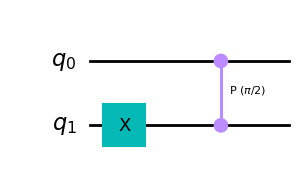

<IPython.core.display.Latex object>

In [2]:
qc1 = QuantumCircuit(2)
qc1.x(1)
qc1.cp(pi/2, 0, 1)
display(qc1.draw('mpl'))
display(Statevector(qc1).draw('latex'))

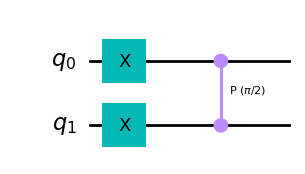

<IPython.core.display.Latex object>

In [3]:
qc2 = QuantumCircuit(2)
qc2.x(1)
qc2.x(0)
qc2.cp(pi/2, 0, 1)
display(qc2.draw('mpl'))
display(Statevector(qc2).draw('latex'))

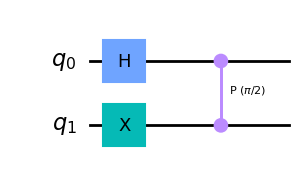

<IPython.core.display.Latex object>

In [4]:
qc3 = QuantumCircuit(2)
qc3.x(1)
qc3.h(0)
qc3.cp(pi/2, 0, 1)
display(qc3.draw('mpl'))
display(Statevector(qc3).draw('latex'))

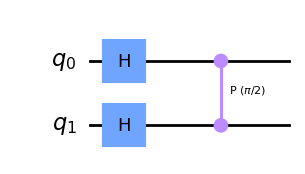

<IPython.core.display.Latex object>

In [5]:
qc4 = QuantumCircuit(2)
qc4.h(1)
qc4.h(0)
qc4.cp(pi/2, 0, 1)
display(qc4.draw('mpl'))
display(Statevector(qc4).draw('latex'))

### 3-Qubit QFT

이제 Qiskit을 통해 3-qubit Quantum Fourier Transform을 구현하겠습니다. 아래의 코드 셀에서 필요한 패키지들을 import 하겠습니다.

우선 3개의 qubits을 가진 빈 양자회로인 "base"양자 회로를 만들어 드리겠습니다.

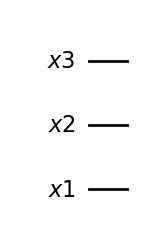

In [6]:
qubit_x1 = QuantumRegister(1, name="x1")
qubit_x2 = QuantumRegister(1, name="x2")
qubit_x3 = QuantumRegister(1, name="x3")

base = QuantumCircuit(qubit_x3, qubit_x2, qubit_x1)
base.draw('mpl')

### 문제 1

qubit `x1`에 가해야할 gate들을 먼저 작성해봅시다. 위의 코드셀을 실행시켜보시면 아시겠지만 `x1`은 가장 아래에 있는 qubit입니다. Part1의 `5. The Circuit that Implements the QFT`에서 나온 QFT 구현 그림과는 qubit 배열이 반대가 되었다는 점 유의하시길 바랍니다.

아래의 코드셀에서 `qft_3_step1` 함수는 3-qubit QFT에서 `x1` qubit에 가해야할 gate들을 가하는 함수입니다. 다음 과정을 통해 만드시면 됩니다.

1. `x1`에 Hadamard gate를 가합니다.
2. `x2`와 `x1` 사이에 $CP$ gate를 가합니다. 이 경우 얼마만큼의 phase를 가해주어야 하는지는 Part1의 이론 파트를 보고 판단하시길 바랍니다.
3. `x3`와 `x1` 사이에 $CP$ gate를 가합니다. 이 경우 얼마만큼의 phase를 가해주어야 하는지는 Part1의 이론 파트를 보고 판단하시길 바랍니다.

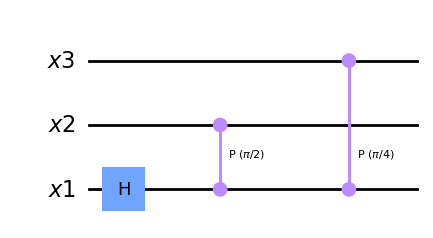

In [7]:
def qft_3_step1(circuit: QuantumCircuit) -> None:
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    

    
    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
qft_3_step1(qc)
answer1 = qc
qc.draw('mpl')

In [ ]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer1.qasm(), "Challenge8a")

### 문제 2

`x1`에 gate들을 가했다면, 이제 `x2`에 gate들을 가할 차례입니다.

아래의 코드셀에서 `qft_3_step2` 함수는 3-qubit QFT에서 `x2` qubit에 가해야할 gate들을 가하는 함수 입니다. 이번에는 만드는 과정을 설명드리진 않겠습니다. Part1에서 다룬 수식들과 문제 1을 참고하여 만들어 보시길 바랍니다!

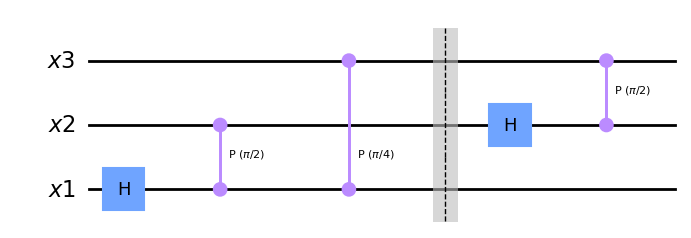

In [8]:
def qft_3_step2(circuit: QuantumCircuit) -> None:
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    
    
    
    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
qft_3_step1(qc)
qc.barrier()
qft_3_step2(qc)
answer2 = qc
qc.draw('mpl')

In [ ]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer2.qasm(), "Challenge8b")

### 문제 3

`x1`과 `x2`에 gate들을 가했다면, 이제 `x3`에 gate들을 가할 차례입니다.

아래의 코드셀에서 `qft_3_step3` 함수는 3-qubit QFT에서 `x3` qubit에 가해야할 gate들을 가하는 함수 입니다. 함수 내부를 채워주세요!

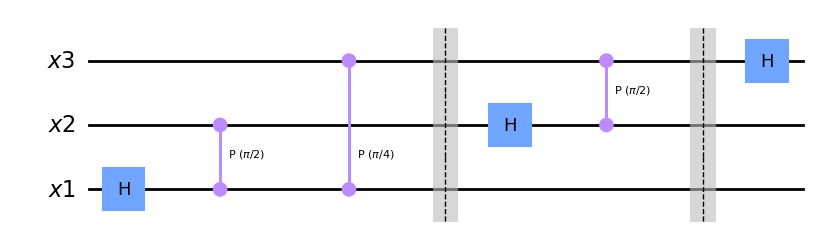

In [9]:
def qft_3_step3(circuit: QuantumCircuit) -> None:
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    
    
    
    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
qft_3_step1(qc)
qc.barrier()
qft_3_step2(qc)
qc.barrier()
qft_3_step3(qc)
answer3 = qc
qc.draw('mpl')

In [ ]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer3.qasm(), "Challenge8c")

### 문제 4

Part1 `5. The Circuit that Implements the QFT`에서는 QFT 회로의 마지막에 어떠한 gate를 가해야 한다고 하였습니다. 그 gate를 가해주는 함수 `qft_3_step4`를 만들고자 합니다. `qft_3_step4` 내부를 작성해주세요!

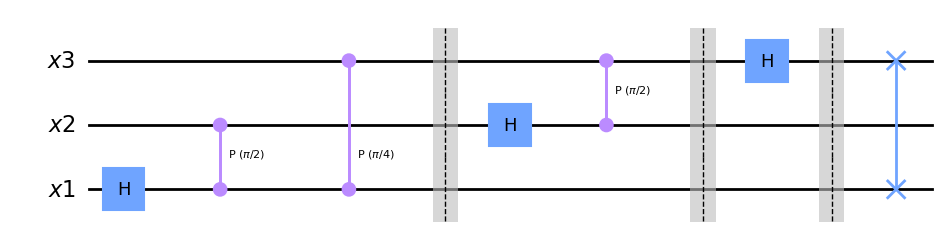

In [10]:
def qft_3_step4(circuit: QuantumCircuit) -> None:
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    
    
    
    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
qft_3_step1(qc)
qc.barrier()
qft_3_step2(qc)
qc.barrier()
qft_3_step3(qc)
qc.barrier()
qft_3_step4(qc)
answer4 = qc
qc.draw('mpl')

In [ ]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer4.qasm(), "Challenge8d")

여러분이 만든 양자회로가 QFT 구현을 잘 하였는지 아래의 코드셀을 실행시켜 확인해봅시다!

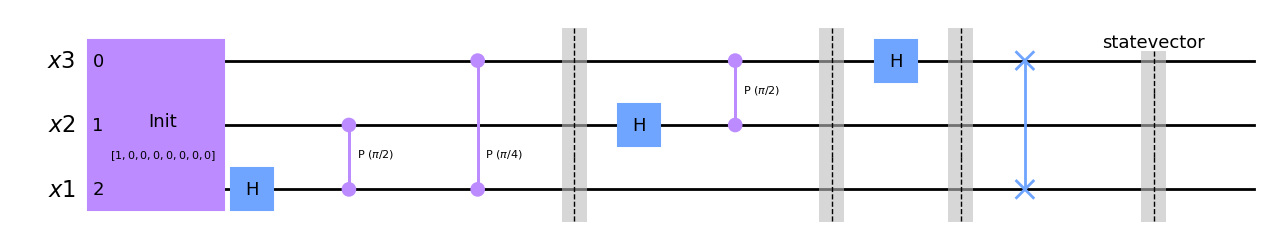

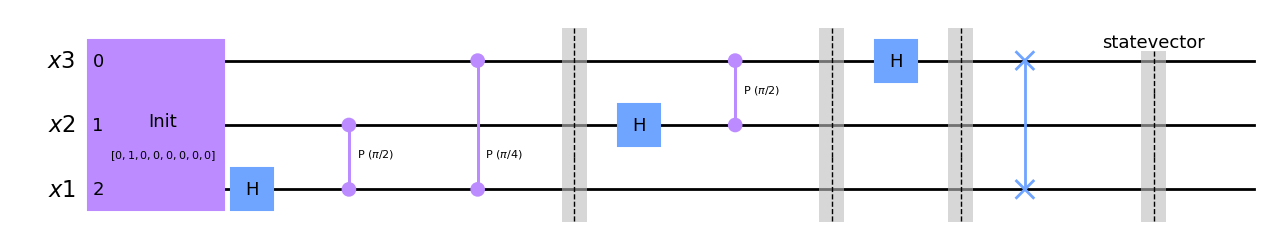

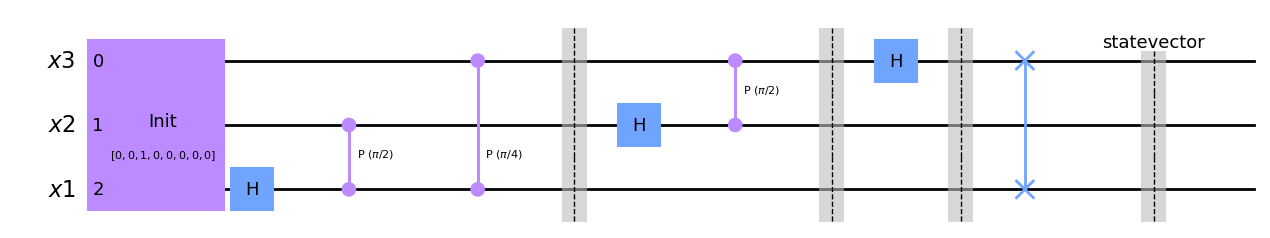

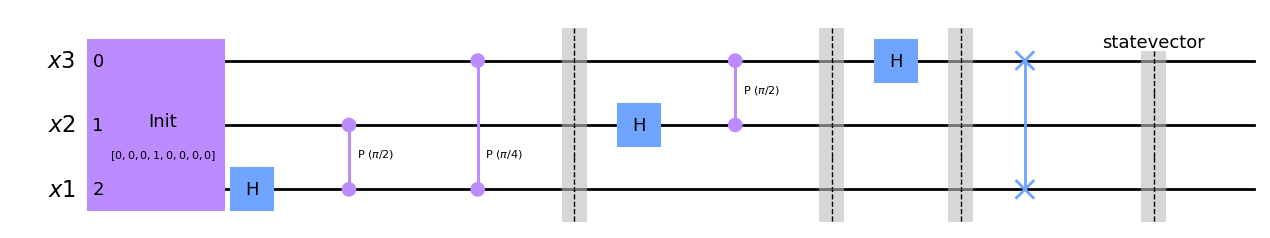

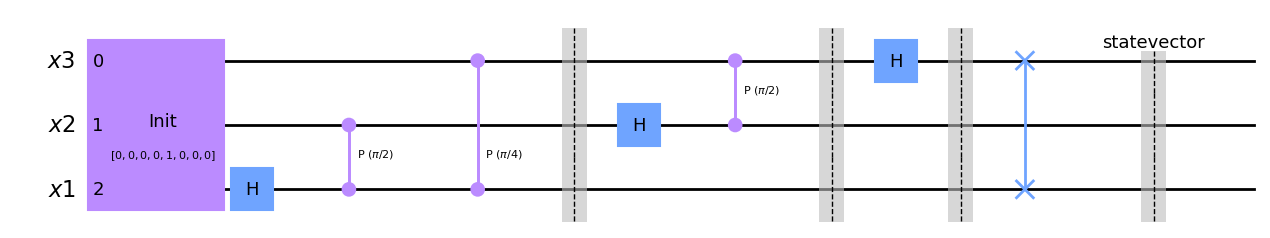

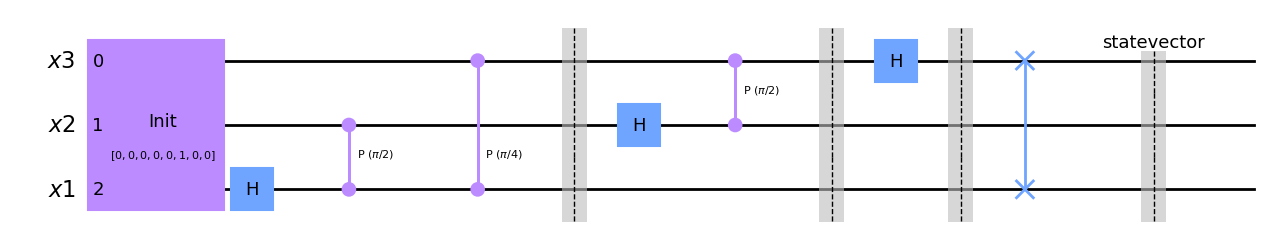

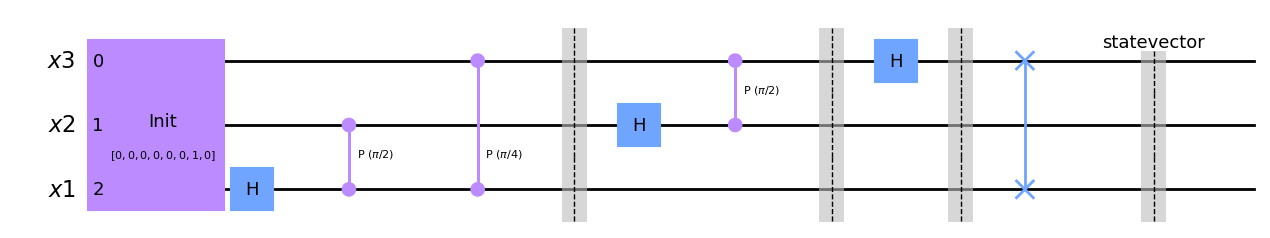

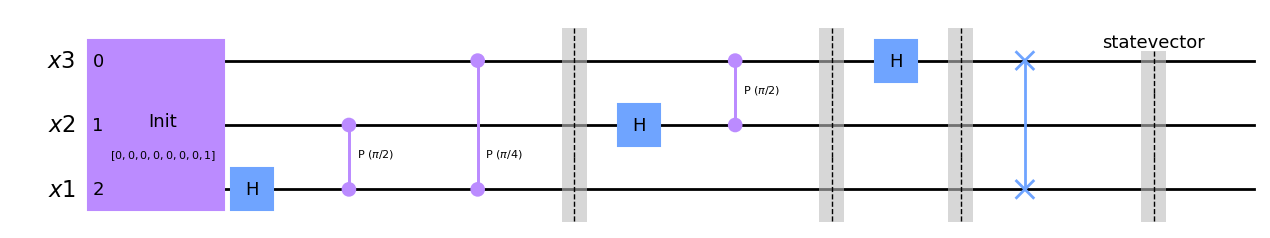

In [28]:
qc_result = []
for i in range(8):
    init_state = []
    
    # 초기화 상태
    for j in range(8):
        if j == i:
            init_state.append(1)
        else:
            init_state.append(0)
    
    init_gate = Initialize(init_state)
    init_gate.label = "Init"
    
    qc_result.append(base.copy_empty_like())
    qc_result[i].append(init_gate, [0,1,2])
    
    # QFT 회로
    qc_result[i].compose(answer4, inplace = True)
    qc_result[i].save_statevector()
    display(qc_result[i].draw('mpl'))

Initial state = 000


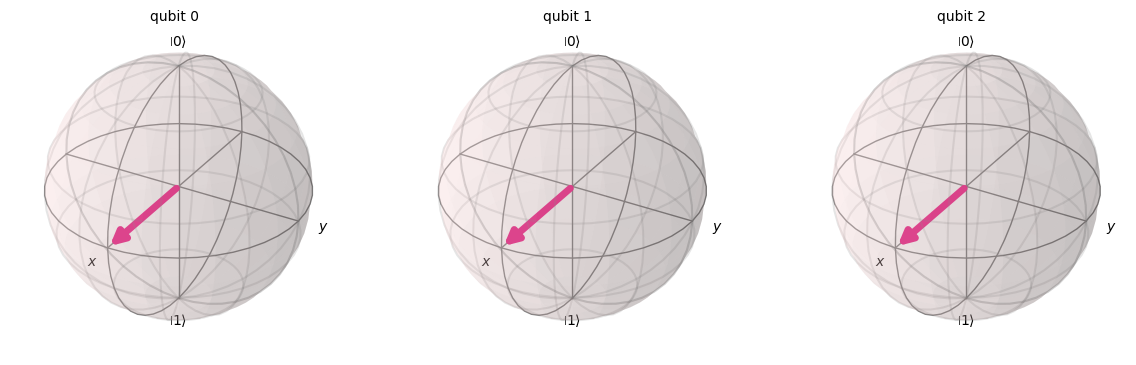

Initial state = 001


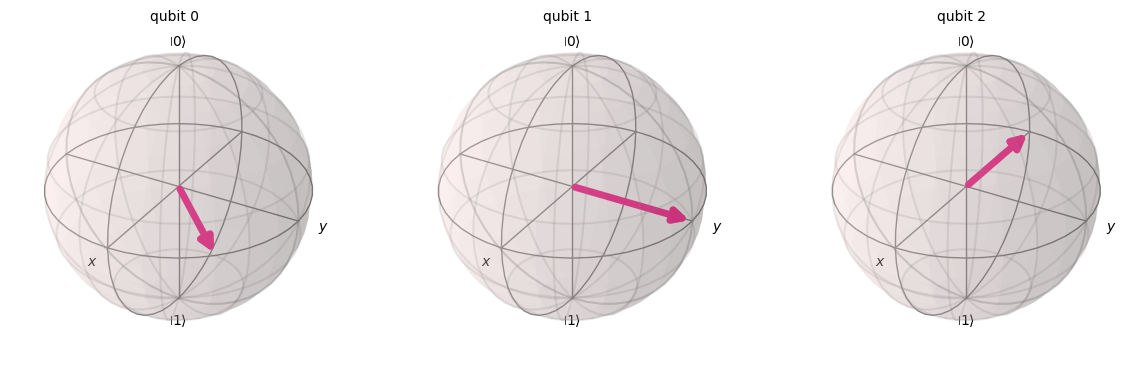

Initial state = 010


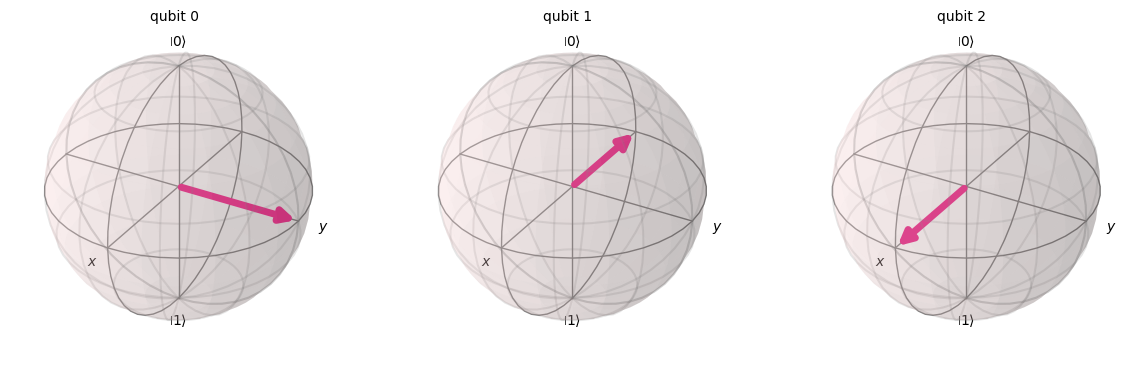

Initial state = 011


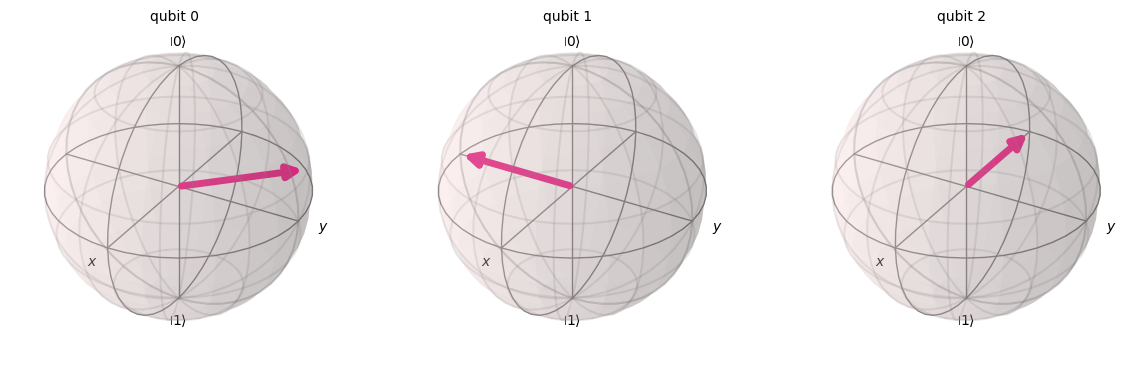

Initial state = 100


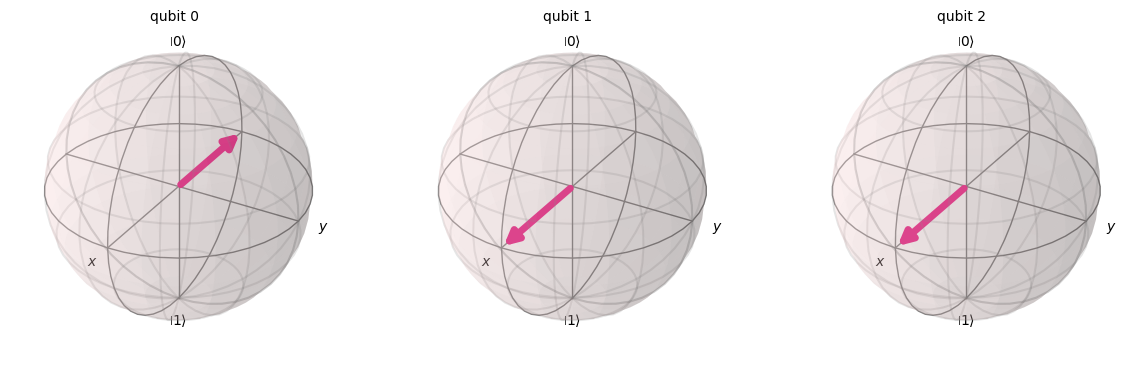

Initial state = 101


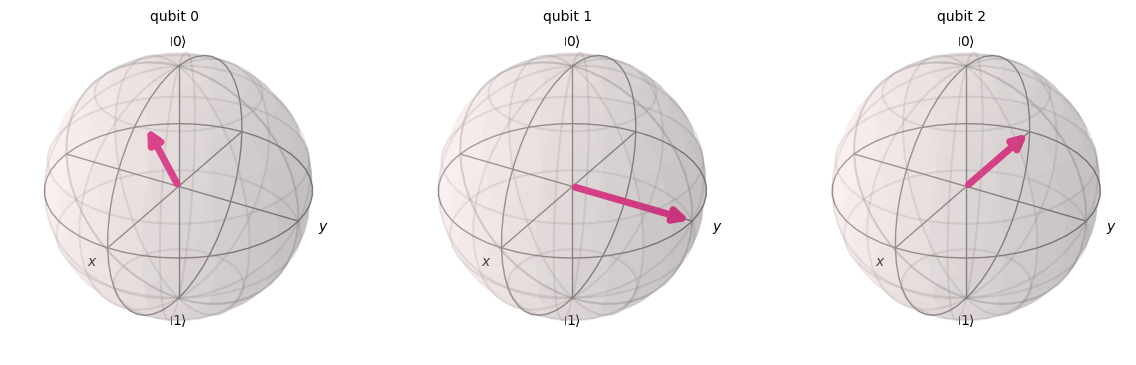

Initial state = 110


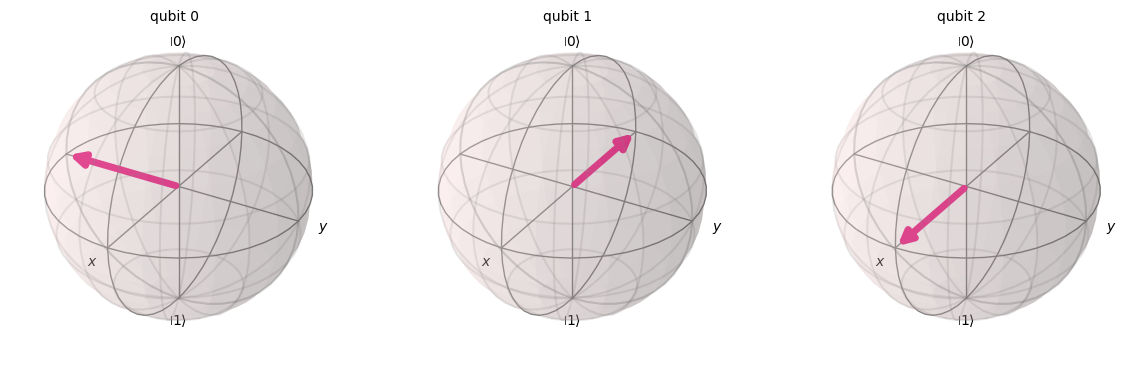

Initial state = 111


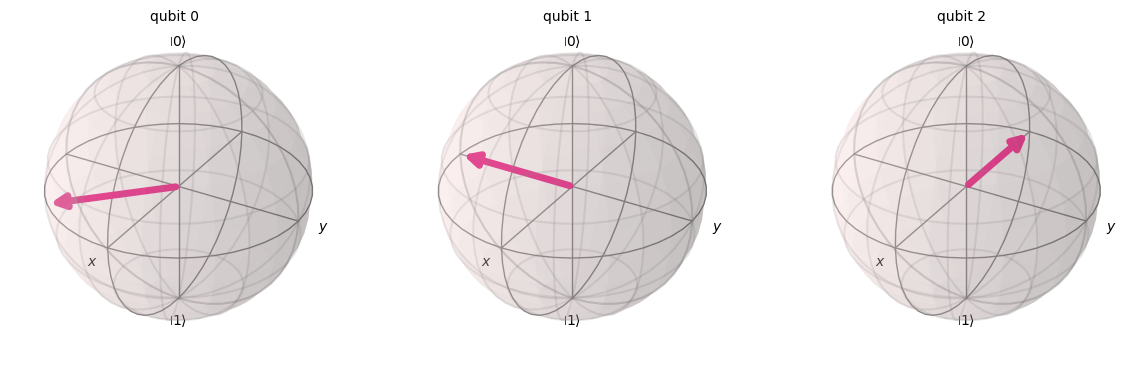

In [29]:
input_state = ["000", "001", "010", "011", "100", "101", "110","111"]
sim = Aer.get_backend('aer_simulator')
for i in range(8):
    out_vector = sim.run(qc_result[i]).result().get_statevector()
    print(f"Initial state = {input_state[i]}")
    display(plot_bloch_multivector(out_vector))

## Part 3: General QFT Function

### 문제 5

이제 Qiskit을 이용하여 일반적인 n-qubt QFT 회로를 만드려고 합니다. 아래의 설명을 보고, 일반적인 n-qubit QFT 회로를 만드는 함수 `qft`를 작성해주세요.

함수 `qft`는 한 개의 입력 `n`을 받습니다. `n`은 몇 개의 qubit에 QFT 연산을 가할 것인지를 의미합니다.


만약 아래의 `qft` 함수를 완성시켰다면, 코드셀에 `qft(1).draw('mpl')` 명령을 쳤을 경우 아래와 같은 그림이 나와야 하며(**barrier는 꼭 넣으실 필요 없습니다**),

![qft1](images/qft1.png)

코드셀에 `qft(2).draw('mpl')` 명령을 쳤을 경우 아래와 같은 그림이 나와야 하고,

![qft2](images/qft2.png)

코드셀에 `qft(3).draw('mpl')` 명령을 쳤을 경우 아래와 같은 그림이 나와야 하고,

![qft3](images/qft3.png)

코드셀에 `qft(4).draw('mpl')` 명령을 쳤을 경우 아래와 같은 그림이 나와야 하고,

![qft4](images/qft4.png)

코드셀에 `qft(5).draw('mpl')` 명령을 쳤을 경우 아래와 같은 그림이 나와야 합니다.

![qft5](images/qft5.png)

**`qft` 함수를 완성시켰다면, 진행자를 불러주세요! 이 문제는 자동 채점기가 없기 때문에 직접 검토해드릴 예정입니다!**

In [157]:
def qft(n: int) -> QuantumCircuit:
    """QFT on the first n qubits in circuit"""
    
    
    
    return circuit

`qft` 함수를 다 완성 시켰다면, 아래의 코드셀을 실행시켜서 잘 작성하였는지 확인해보시길 바랍니다.

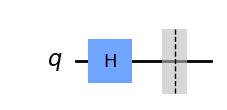

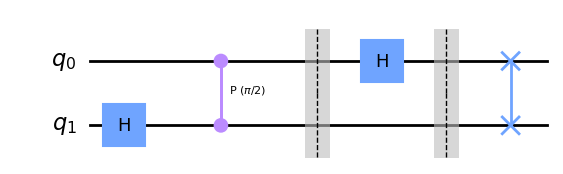

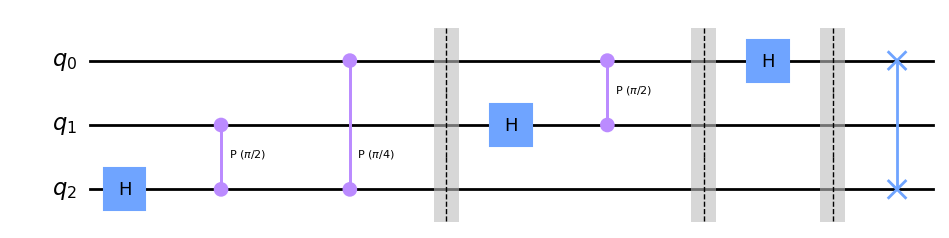

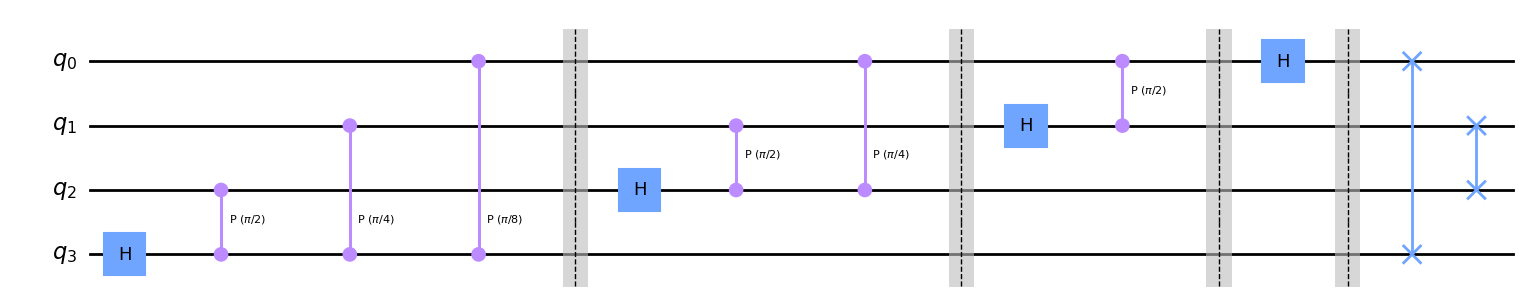

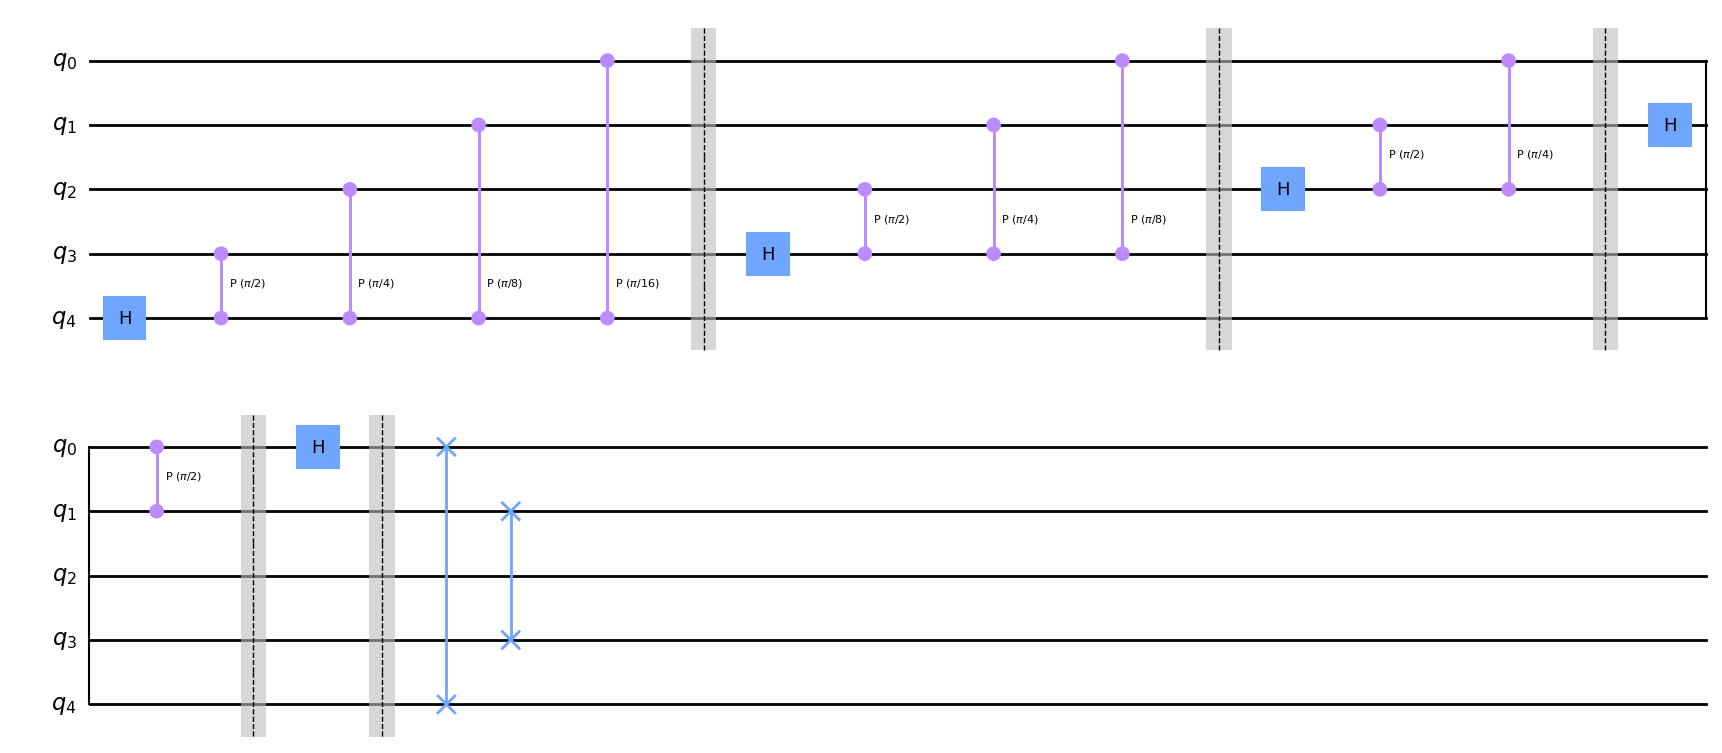

In [16]:
display(qft(1).draw('mpl'))
display(qft(2).draw('mpl'))
display(qft(3).draw('mpl'))
display(qft(4).draw('mpl'))
display(qft(5).draw('mpl'))

## 축하합니다!

여러분은 이번 챌린지에서 수학적으로 가장 어렵다고 할 수 있는 QFT 챌린지를 완주하셨습니다! 수고 많으셨습니다. 남은 챌린지 문제들도 파이팅입니다!!